# Analysis of Fixed Income Securities

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


D:\Python\bondProjectLocal\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Python\bondProjectLocal\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\Python\bondProjectLocal\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
df = pd.read_csv('ctap_analytics_pnl_decomp_sample_day.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

## Data exploration

In [4]:
df.head()

,timestamp,type,cusip,spread_pnl,benchmark_cusip,new_position,ticker,securitydes,industrySector,mat_bucket,liq_score,liq_bucket,weightedage
0,2021-07-28 06:00:00,MARK,718172CQ0,-0.618819,91282CCK5,-39,PM,PM 1 1/8 05/01/23,"Consumer, Non-cyclical",B02,1487,LB1000,6.84615
1,2021-07-28 06:00:00,MARK,718172CQ0,-0.618819,91282CCK5,-39,PM,PM 1 1/8 05/01/23,"Consumer, Non-cyclical",B02,1487,LB1000,6.84615
2,2021-07-28 06:00:00,MARK,03073EAS4,0.060743,91282CCK5,5,ABC,ABC 0.737 03/15/23,"Consumer, Non-cyclical",B02,427,LB0250,1.00000
3,2021-07-28 06:00:00,MARK,723484AH4,0.291196,91282CCJ8,-13,PNW,PNW 1.3 06/15/25,Utilities,B05,2533,LB2000,27.00000
4,2021-07-28 06:00:00,MARK,742718ER6,-0.212672,91282CCJ8,2,PG,PG 2.45 11/03/26,"Consumer, Non-cyclical",B05,1916,LB1000,10.00000


### Duplicate data
I have found that there is one observation that is a duplicate

In [5]:
beginning_len = len(df)
dropped_len = len(df.drop_duplicates())
print(f'The dataframe began with {beginning_len} observations and then, after dropping duplicates, we were left with {dropped_len} observations.')

The dataframe began with 55718 observations and then, after dropping duplicates, we were left with 55717 observations.


## Data modification
I have decided to slightly modify the dataset to address my findings in the data exploration section.
Namely, I have done the following:
- Drop the duplicated observation

### Drop duplicates
I am dropping the duplicate values, as we only need one observation for a given timestamp/CUSIP combination

In [6]:
df = df.drop_duplicates()

## Analysis

### Overall profit and loss across all CUSIPs throughout time

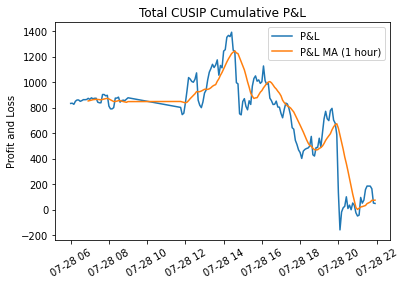

In [7]:
cumulative_spread_pnl = np.cumsum(df.groupby('timestamp')['spread_pnl'].sum())
cumulative_spread_pnl_MA = cumulative_spread_pnl.rolling(12).mean()
plt.plot(cumulative_spread_pnl, label='P&L')
plt.plot(cumulative_spread_pnl_MA, label='P&L MA (1 hour)')
plt.xticks(rotation=30)
plt.ylabel('Profit and Loss')

plt.legend()
plt.title('Total CUSIP Cumulative P&L')
plt.show()

### CUSIPs with large losses and gains over entire range

In [8]:
n_cusips = 30

cumulative = df.groupby(['cusip', 'timestamp'])['spread_pnl'].sum().groupby(level=0).cumsum().reset_index()
cumulative.columns = ['cusip', 'timestamp', 'cumulative_pnl']

df = pd.merge(df, cumulative, on=['timestamp', 'cusip'])


In [9]:
difference_cumulative = (df.groupby('cusip')['cumulative_pnl'].last() - df.groupby('cusip')['cumulative_pnl'].first())
difference_cumulative = difference_cumulative.sort_values()
winners = difference_cumulative[-n_cusips:].iloc[::-1]
losers = difference_cumulative[:n_cusips]

In [10]:
winners.reset_index()

,cusip,cumulative_pnl
0,742718FG9,184.745510
1,68389XBL8,135.933830
2,89236THG3,108.464667
3,00914AAH5,98.849109
4,302635AG2,94.946352
5,46124HAA4,83.226557
6,928668BL5,83.204654
7,46625HRV4,83.063795
8,281020AN7,75.086144
9,6174467X1,64.889666


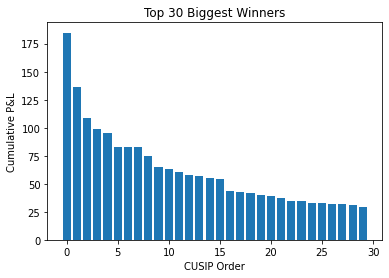

In [11]:
plt.bar(list(range(n_cusips)), winners.reset_index()['cumulative_pnl'])
plt.xlabel('CUSIP Order')
plt.ylabel('Cumulative P&L')
plt.title(f'Top {n_cusips} Biggest Winners')
plt.show()

In [12]:
losers.reset_index()

,cusip,cumulative_pnl
0,254709AM0,-279.984222
1,92826CAP7,-236.284840
2,745867AX9,-182.323575
3,785592AS5,-156.907800
4,78013XW20,-125.216640
5,172967KA8,-110.204121
6,291011BP8,-101.288510
7,87612EBD7,-98.693604
8,437076BC5,-93.768223
9,89788MAC6,-80.512902


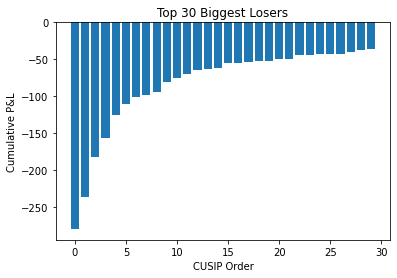

In [58]:
plt.bar(list(range(n_cusips)), losers.reset_index()['cumulative_pnl'])
plt.xlabel('CUSIP Order')
plt.ylabel('Cumulative P&L')
plt.title(f'Top {n_cusips} Biggest Losers')
plt.show()

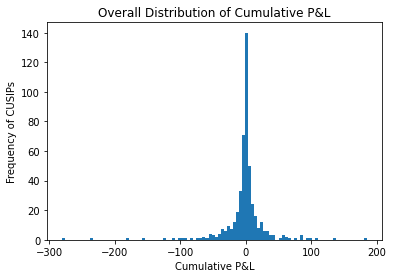

In [64]:
plt.hist(difference_cumulative, bins=100)
plt.title('Overall Distribution of Cumulative P&L')
plt.ylabel('Frequency of CUSIPs')
plt.xlabel('Cumulative P&L')
plt.show()

## P&L Total Excluding Top 6 Losers

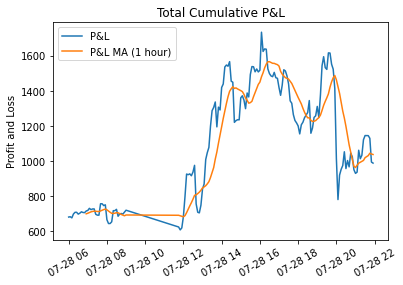

In [26]:
excluded_cusips = ['254709AM0', '92826CAP7', '745867AX9', '785592AS5', '78013XW20', '172967KA8']
excluded = df[~df['cusip'].isin(excluded_cusips)]

cumulative_spread_pnl = np.cumsum(excluded.groupby('timestamp')['spread_pnl'].sum())
cumulative_spread_pnl_MA = cumulative_spread_pnl.rolling(12).mean()
plt.plot(cumulative_spread_pnl, label='P&L')
plt.plot(cumulative_spread_pnl_MA, label='P&L MA (1 hour)')
plt.xticks(rotation=30)
plt.ylabel('Profit and Loss')

plt.legend()
plt.title('Total Cumulative P&L')
plt.show()

### What is the commonality between these losing securities?
Seems like this might have been a bad day for financials.
Two to six-years to maturity is also a common characteristic.

In [27]:
df[df['cusip'].isin(excluded_cusips)][['type', 'cusip', 'benchmark_cusip', 'new_position', 'ticker', 'securitydes', 'industrySector', 'mat_bucket', 'liq_score', 'liq_bucket']].drop_duplicates()

,type,cusip,benchmark_cusip,new_position,ticker,securitydes,industrySector,mat_bucket,liq_score,liq_bucket
4,MARK,745867AX9,91282CCJ8,-100,PHM,PHM 5 01/15/27,"Consumer, Cyclical",B05,1338,LB1000
30,MARK,785592AS5,91282CCJ8,-90,SPLLLC,SPLLLC 5 03/15/27,Energy,B05,2181,LB2000
43,MARK,78013XW20,91282CCK5,85,RY,RY 3.7 10/05/23,Financial,B02,612,LB0500
132,MARK,92826CAP7,91282CCJ8,-60,V,V 0 3/4 08/15/27,Financial,B05,1620,LB1000
234,MARK,254709AM0,91282CCJ8,-224,DFS,DFS 4.1 02/09/27,Financial,B05,2156,LB2000
276,MARK,172967KA8,91282CCJ8,-72,C,C 4.45 09/29/27,Financial,B05,269,LB0250
24899,MARK,78013XW20,91282CCK5,150,RY,RY 3.7 10/05/23,Financial,B02,612,LB0500
32781,MARK,78013XW20,91282CCK5,163,RY,RY 3.7 10/05/23,Financial,B02,612,LB0500
38752,MARK,78013XW20,91282CCK5,176,RY,RY 3.7 10/05/23,Financial,B02,612,LB0500


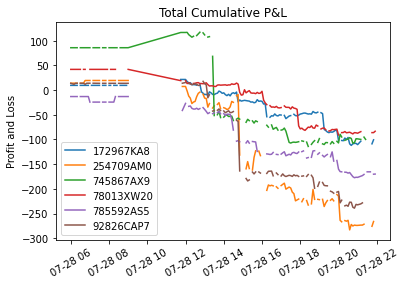

In [30]:
ex = df[df['cusip'].isin(excluded_cusips)]
ex = ex.groupby(['cusip', 'timestamp'])['cumulative_pnl'].sum().unstack().T
plt.plot(ex)
plt.xticks(rotation=30)
plt.ylabel('Profit and Loss')

plt.legend(ex.columns)
plt.title('Total Cumulative P&L')
plt.show()

### What happend to Royal Bank of Canada (RY)?
On July 28th, Royal Bank of Canada issued 650 million new senior floating notes due in 2024 and 850 million senior fixed notes at 0.650%. This could have devalued these existing bonds because issuing over a billion in new debt could indicate rising credit risk. Yields for this bank could have increased, causing P&L for the CUSIPs in the portfolio to decrease.

### Market driven or company driven?
- DFS is a lower medium grade bond
- RBC is upper medium grade bond
- C is a lower medium grade bond
- V is a high grade bond

Market yields for this time period went down. Perhaps these securities were not as in demand due to their credit ratings. The continuation of this downward trend could be due to a market desire to be in less risky securities at this time.